# Lab 2: Data Loading, Cleaning, and Exploration

In this lab, we will cover the following topics:
1. Data loading and cleaning
2. Feature engineering examples
3. Handling missing data
4. Visualizations/data exploration

Each section includes basic implementation and questions for further exploration.

## 1. Data Loading and Cleaning

We will start by loading and cleaning a dataset. We will also explore different techniques for data cleaning.

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data Cleaning

We will clean the dataset by handling missing values, removing duplicates, and fixing inconsistent entries.

In [4]:
# Remove duplicates
data = data.drop_duplicates()

# Fix inconsistent entries
data['sex'] = data['sex'].replace({'male': 'Male', 'female': 'Female'})

# Display the cleaned dataset
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,Male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,Female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,Female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,Female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,Male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Questions for Exploration

1. How does removing duplicates affect the dataset?
2. What other inconsistencies can you find and fix in the dataset?
3. How does the choice of dataset affect the data cleaning process?

## 2. Feature Engineering Examples

Next, we will create new features from the existing ones. We will also explore different techniques for feature engineering.

In [5]:
# Create new features
data['family_size'] = data['sibsp'] + data['parch'] + 1
data['is_alone'] = (data['family_size'] == 1).astype(int)

# Display the dataset with new features
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,is_alone
0,0,3,Male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0
1,1,1,Female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0
2,1,3,Female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,1
3,1,1,Female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0
4,0,3,Male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,1


### Questions for Exploration

1. How do the new features affect the dataset?
2. What other features can you create from the existing ones?
3. How does feature scaling (e.g., standardization, normalization) affect the dataset?

## 3. Handling Missing Data

We will handle missing data by using different techniques such as imputation and deletion. We will also explore the impact of these techniques on the dataset.

In [6]:
# Identify missing values
missing_data = data.isnull().sum()
print(missing_data)

# Impute missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Display the dataset after handling missing data
data.head()


survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
family_size      0
is_alone         0
dtype: int64


/var/folders/k9/vcw_mvv16nxc8ncjdxnvv5fm0000gn/T/ipykernel_74361/286846126.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
/var/folders/k9/vcw_mvv16nxc8ncjdxnvv5fm0000gn/T/ipykernel_74361/286846126.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,is_alone
1,1,1,Female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0
3,1,1,Female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0
6,0,1,Male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,1
10,1,3,Female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,3,0
11,1,1,Female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1,1


### Questions for Exploration

1. How does imputation affect the dataset?
2. What happens to the dataset if you use different imputation techniques (e.g., median, mode)?
3. How does the choice of dataset affect the handling of missing data?

## 4. Visualizations/Data Exploration

We will visualize and explore the dataset using different techniques. We will also explore the impact of these visualizations on data interpretation.

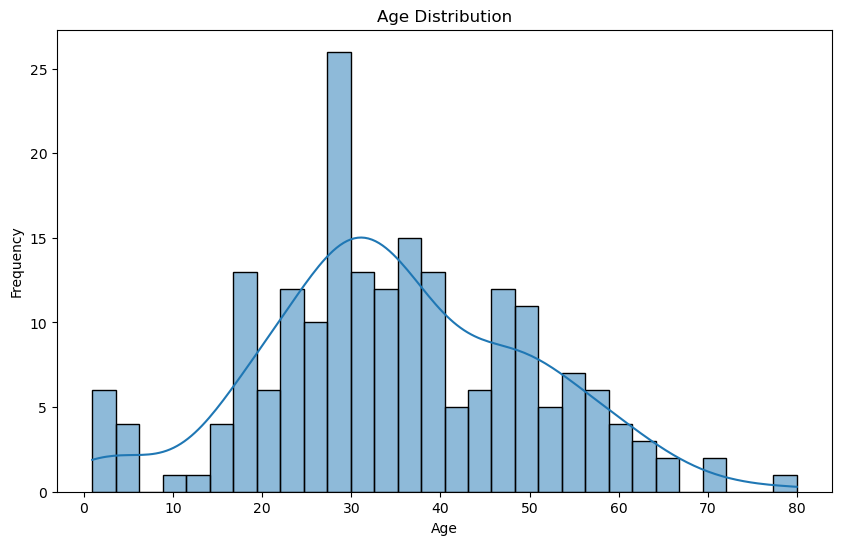

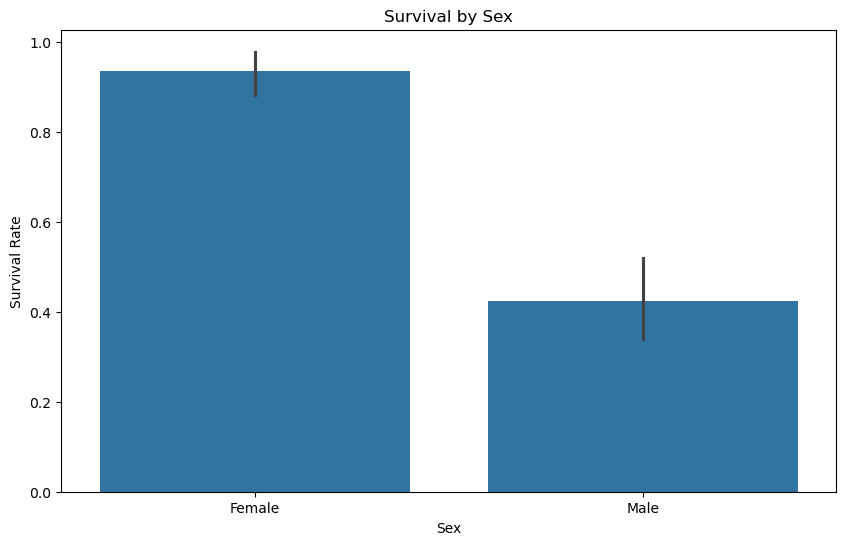

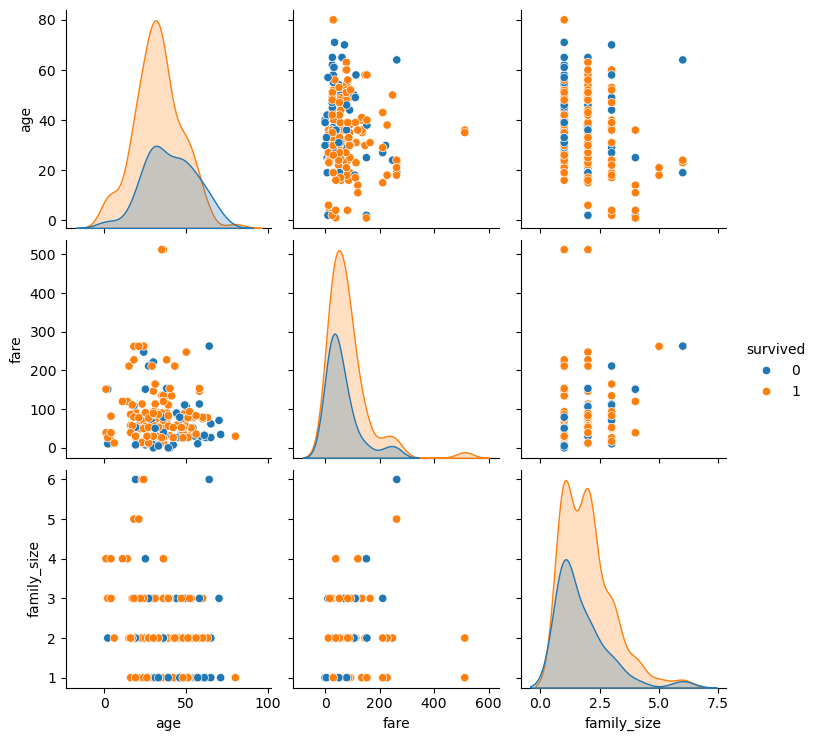

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of survival by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=data)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Pair plot of numerical features
sns.pairplot(data[['age', 'fare', 'family_size', 'survived']], hue='survived')
plt.show()


### Questions for Exploration

1. How do the visualizations help in understanding the dataset?
2. What other visualizations can you create to explore the dataset?
3. How does the choice of visualization technique affect the interpretation of the data?

## Extensions

Explore other data preprocessing techniques such as:
- Outlier detection and removal
- Encoding categorical variables (e.g., one-hot encoding, label encoding)
- Feature selection techniques (e.g., correlation matrix, mutual information)

Compare their impact on the dataset and the performance of downstream machine learning models.